In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import datetime

%matplotlib inline

### FIRE DATASET FROM KAGGLE

In [55]:
df = pd.read_csv('Fires_CA.csv')

In [57]:
df.head(50)

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE
0,1067487,2010,Equipment Use,36.766944,-121.303056,CA,NaN,NaN,2455335.5,NaN,NaN,NaN,70.0
1,1067488,2010,Miscellaneous,36.776944,-121.311111,CA,NaN,NaN,2455355.5,NaN,NaN,NaN,0.5
2,1067489,2010,Miscellaneous,36.856111,-121.381111,CA,NaN,NaN,2455359.5,NaN,NaN,NaN,0.1
3,1067490,2010,Miscellaneous,36.818056,-121.391111,CA,NaN,NaN,2455361.5,NaN,NaN,NaN,0.1
4,1067491,2010,Miscellaneous,36.883056,-121.561944,CA,NaN,NaN,2455388.5,NaN,NaN,NaN,1.0
5,1067492,2010,Debris Burning,36.936111,-121.388056,CA,NaN,NaN,2455406.5,NaN,NaN,NaN,0.3
6,1067493,2010,Equipment Use,36.758056,-121.503056,CA,NaN,NaN,2455450.5,NaN,NaN,NaN,0.5
7,1067504,2010,Miscellaneous,36.818056,-121.391111,CA,NaN,NaN,2455271.5,NaN,NaN,NaN,0.1
8,1067505,2010,Miscellaneous,36.883056,-121.561944,CA,NaN,NaN,2455317.5,NaN,NaN,NaN,1.0
9,1067506,2010,Miscellaneous,35.953056,-120.866944,CA,NaN,NaN,2455370.5,NaN,NaN,NaN,16.0


In [58]:
df.dropna(inplace=True)

In [59]:
df.head(50)

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE
1368,1147155,2010,Arson,34.439722,-118.276389,CA,37.0,Los Angeles,2455202.5,1510.0,2455202.5,1530.0,0.10
1369,1147161,2010,Campfire,34.640556,-118.504722,CA,37.0,Los Angeles,2455213.5,300.0,2455213.5,950.0,0.10
1370,1147162,2010,Miscellaneous,34.742222,-118.623333,CA,37.0,Los Angeles,2455212.5,1337.0,2455212.5,1430.0,0.20
1371,1147164,2010,Campfire,34.383056,-117.700833,CA,37.0,Los Angeles,2455213.5,1214.0,2455213.5,1226.0,0.10
1372,1147168,2010,Arson,38.535000,-120.517778,CA,17.0,El Dorado,2455213.5,1130.0,2455213.5,1230.0,0.40
1373,1147173,2010,Lightning,34.400278,-117.862222,CA,37.0,Los Angeles,2455234.5,1100.0,2455234.5,1145.0,0.10
1374,1147182,2010,Miscellaneous,38.068611,-120.276667,CA,109.0,Tuolumne,2455197.5,1200.0,2455207.5,1200.0,0.10
1375,1147185,2010,Equipment Use,34.560833,-118.680556,CA,37.0,Los Angeles,2455237.5,2105.0,2455237.5,2130.0,0.10
1376,1147186,2010,Arson,34.592500,-118.453056,CA,37.0,Los Angeles,2455239.5,2200.0,2455239.5,2240.0,0.10
1377,1147188,2010,Equipment Use,37.149722,-119.458611,CA,39.0,Madera,2455201.5,1228.0,2455201.5,1300.0,0.10


In [64]:
df['FIRE_SIZE'].tail(10)

38888    0.10
38889    0.01
38890    9.90
38891    0.01
38892    1.00
38893    0.02
38894    0.01
38896    0.10
38897    0.10
38899    0.01
Name: FIRE_SIZE, dtype: float64

In [6]:
df['FIPS_NAME'].unique()

array(['Los Angeles', 'El Dorado', 'Tuolumne', 'Madera', 'Kern', 'Modoc',
       'Monterey', 'San Bernardino', 'Shasta', 'Plumas', 'Riverside',
       'Sierra', 'Lake', 'Trinity', 'San Diego', 'Santa Barbara',
       'Amador', 'Mono', 'Orange', 'Nevada', 'Siskiyou', 'Tulare', 'Inyo',
       'Yuba', 'Lassen', 'Ventura', 'Butte', 'Tehama', 'San Luis Obispo',
       'Alpine', 'Fresno', 'Placer', 'Calaveras', 'Humboldt', 'Del Norte',
       'Colusa', 'Mariposa', 'Mendocino', 'Glenn', 'Imperial',
       'San Benito', 'Sacramento', 'Solano', 'Kings', 'Napa',
       'Stanislaus', 'Merced', 'Contra Costa', 'Sonoma', 'Santa Clara',
       'Santa Cruz', 'San Mateo', 'Alameda', 'Yolo', 'San Joaquin',
       'Sutter'], dtype=object)

In [7]:
df.shape

(19703, 13)

In [8]:
## Converting Julian Date to Datetime

In [9]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [10]:
df['DISCOVERY_DATE'].dtype

dtype('float64')

In [44]:
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'][:-1]
df.head()

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,DATE,TIME1,TIME2,DISCOVERY_TIME_2
1368,1147155,2010,Arson,34.439722,-118.276389,CA,37.0,Los Angeles,2455202.5,1510.0,2455202.5,1530.0,0.1,2010-01-06,15,10,1970-01-01 00:00:00.000000025
1369,1147161,2010,Campfire,34.640556,-118.504722,CA,37.0,Los Angeles,2455213.5,300.0,2455213.5,950.0,0.1,2010-01-17,3,0,1970-01-01 00:00:00.000000003
1370,1147162,2010,Miscellaneous,34.742222,-118.623333,CA,37.0,Los Angeles,2455212.5,1337.0,2455212.5,1430.0,0.2,2010-01-16,13,37,1970-01-01 00:00:00.000000050
1371,1147164,2010,Campfire,34.383056,-117.700833,CA,37.0,Los Angeles,2455213.5,1214.0,2455213.5,1226.0,0.1,2010-01-17,12,14,1970-01-01 00:00:00.000000026
1372,1147168,2010,Arson,38.535000,-120.517778,CA,17.0,El Dorado,2455213.5,1130.0,2455213.5,1230.0,0.4,2010-01-17,11,30,1970-01-01 00:00:00.000000041


In [48]:
t1 = df['DISCOVERY_TIME'].astype(str).str.zfill(1)
#t2 = quote['SellTime'].astype(str).str.zfill(6)
#df['Discovery_time_true'] = pd.to_datetime(t1, format='%H%M%S').dt.time
#quote['SellTime'] = pd.to_datetime(t2, format='%H%M%S').dt.time
df['Discovery_time_true'] = pd.to_datetime(t1, format='%H%M.%f').dt.strftime('%H:%M:%S')

ValueError: time data '1.0' does not match format '%H%M.%f' (match)

### METEROLOGICAL DATASET

In [9]:
df_met = pd.read_csv("MetStations_CA.csv")

In [53]:
df_met.head()

NameError: name 'df_met' is not defined

In [29]:
df_met.shape

(155, 10)

## Set the coordinate reference system for the met data and convert to a Geopandas dataframe

In [11]:
crs = {'init': 'epsg:4326'}

In [12]:
geometry_met = [Point(xy) for xy in zip(df_met['LONGITUDE'], df_met['LATITUDE'])]

In [14]:
geo_df_met = gpd.GeoDataFrame(df_met, crs = crs, geometry = geometry_met)

###### Here, I'm using the Nearest Points function from the Shapely library to locate the nearest meterological station to each of the fire locations. The dataframe 'df_met' contains a list of all meterological stations in California. Each station as a latitude and longitude associated with it. The nearest point function in the shapefile library looks for the nearest (x,y) point for each fire location from the (x,y) points from the met dataframe. 


##### Note that he unary_union function below returns a geometry containing the union of all geometries in the Geoseries. 

In [46]:
# Unary Union of the geo_df geometry

pts = geo_df_met.geometry.unary_union
def near(point, pts=pts):
     # find the nearest point and return the corresponding Station name
     nearest = geo_df_met.geometry == nearest_points(point, pts)[1]
     return geo_df_met[nearest].STATION.to_numpy()[0]
geo_df['Nearest_Station'] = geo_df.apply(lambda row: near(row.geometry), axis=1)

In [47]:
geo_df.head()

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,geometry,Nearest,Nearest_Station
1368,1147155,2010,Arson,34.439722,-118.276389,CA,37.0,Los Angeles,2455202.5,1510.0,2455202.5,1530.0,0.1,POINT (-118.27639 34.43972),"LOS ANGELES WHITEMAN AIRPORT, CA US","LOS ANGELES WHITEMAN AIRPORT, CA US"
1369,1147161,2010,Campfire,34.640556,-118.504722,CA,37.0,Los Angeles,2455213.5,300.0,2455213.5,950.0,0.1,POINT (-118.50472 34.64056),"SANDBERG, CA US","SANDBERG, CA US"
1370,1147162,2010,Miscellaneous,34.742222,-118.623333,CA,37.0,Los Angeles,2455212.5,1337.0,2455212.5,1430.0,0.2,POINT (-118.62333 34.74222),"SANDBERG, CA US","SANDBERG, CA US"
1371,1147164,2010,Campfire,34.383056,-117.700833,CA,37.0,Los Angeles,2455213.5,1214.0,2455213.5,1226.0,0.1,POINT (-117.70083 34.38306),"LA VERNE BRACKETT FIELD, CA US","LA VERNE BRACKETT FIELD, CA US"
1372,1147168,2010,Arson,38.535000,-120.517778,CA,17.0,El Dorado,2455213.5,1130.0,2455213.5,1230.0,0.4,POINT (-120.51778 38.53500),"PLACERVILLE AIRPORT, CA US","PLACERVILLE AIRPORT, CA US"


#### Plotting Wildfire Data

In [37]:
usa = gpd.read_file('../Idea1/states_21basic/states.shp')

In [38]:
usa.drop(usa[usa['STATE_NAME'] =='Alaska'].index, inplace=True)
usa.drop(usa[usa['STATE_NAME'] =='Hawaii'].index, inplace=True)

In [39]:
CA = usa[usa.STATE_ABBR == 'CA']

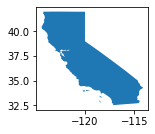

In [40]:
fig, ax = plt.subplots(figsize = (2,2))
CA.plot(ax = ax)

In [41]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [42]:
len(geometry)

19703

In [43]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

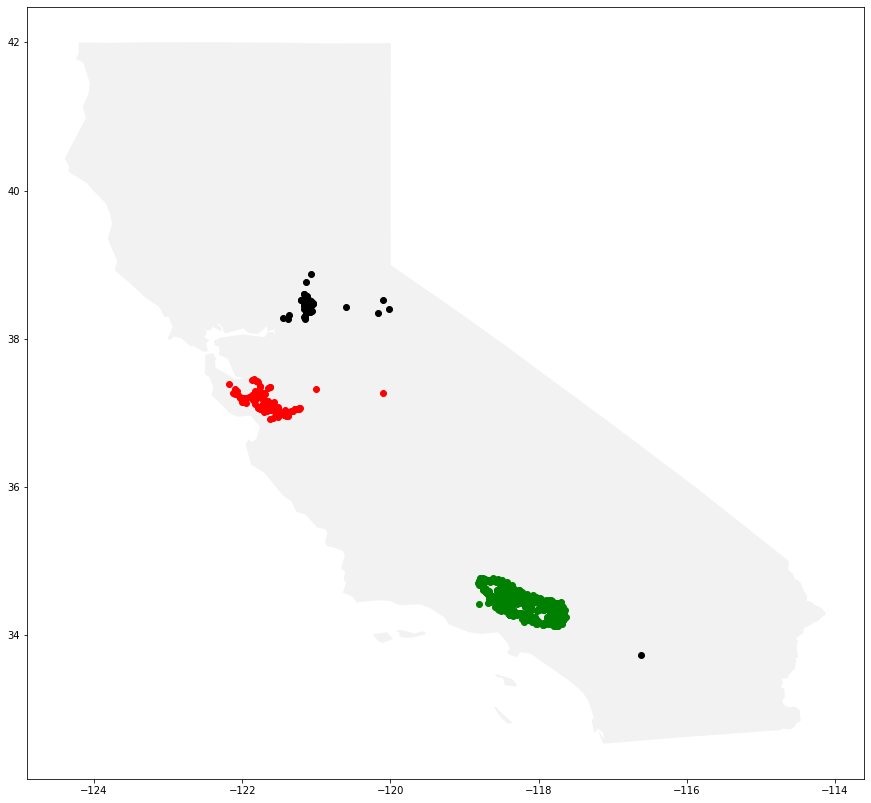

In [44]:
fig, ax = plt.subplots(figsize = (15,15))
CA.plot(ax=ax, alpha = 0.1, color='grey')
geo_df[geo_df['FIPS_NAME'] == 'Santa Clara'].plot(ax = ax, color='red')
geo_df[geo_df['FIPS_NAME'] == 'Los Angeles'].plot(ax = ax, color='green')
geo_df[geo_df['FIPS_NAME'] == 'Sacramento'].plot(ax = ax, color='black')

##### NExt step is to download meterological data for each county, for each year. Download NDVI, elevation data etc. 